# Ejemplo de K-Nearest Neighbors (KNN) en aprendizaje supervisado
Este cuaderno demuestra un ejemplo práctico de clasificación con el algoritmo KNN usando scikit-learn.
Incluye explicaciones línea a línea y una sección sobre hiperparámetros.

## Objetivos
- Generar un dataset sintético para clasificación.
- Preparar los datos (split y escalado).
- Entrenar un clasificador KNN y evaluar su desempeño.
- Explicar cada bloque de código línea a línea.
- Mostrar cómo ajustar hiperparámetros con GridSearchCV.

In [1]:
# Importar librerías necesarias
import numpy as np  # operaciones numéricas
import pandas as pd  # manejo de datos en tablas
from sklearn.datasets import make_classification  # crear dataset sintético
from sklearn.model_selection import train_test_split, GridSearchCV  # dividir datos y búsqueda de hiperparámetros
from sklearn.preprocessing import StandardScaler  # escalado de características
from sklearn.neighbors import KNeighborsClassifier  # el clasificador KNN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # métricas
import matplotlib.pyplot as plt  # visualización básica
import seaborn as sns  # visualización más agradable
%matplotlib inline

Explicación de las importaciones (línea a línea):
- import numpy as np: numpy se usa para operaciones numéricas y arreglos.
- import pandas as pd: pandas facilita la manipulación de datos en formato tabular (DataFrame).
- from sklearn.datasets import make_classification: función para generar datos sintéticos etiquetados (útil para ejemplos).
- from sklearn.model_selection import train_test_split, GridSearchCV: dividir datos en entrenamiento/prueba y buscar hiperparámetros con validación cruzada.
- from sklearn.preprocessing import StandardScaler: normaliza/estandariza características (KNN es sensible a la escala).
- from sklearn.neighbors import KNeighborsClassifier: implementación de KNN en scikit-learn.
- from sklearn.metrics import ...: métricas para evaluar precisión y reporte por clases.
- import matplotlib.pyplot as plt / import seaborn as sns: para visualizar resultados.
- %matplotlib inline: muestra gráficas dentro del cuaderno (Jupyter).

In [2]:
# Crear un dataset sintético de clasificación
X, y = make_classification(n_samples=1000,    # número total de instancias
                           n_features=5,      # número de características
                           n_informative=3,   # cuántas de las características son informativas
                           n_redundant=0,     # características redundantes
                           n_classes=3,       # número de clases (multiclase)
                           random_state=42)   # semilla para reproducibilidad

# Convertir a DataFrame para inspección rápida
df = pd.DataFrame(X, columns=[f"x{i+1}" for i in range(X.shape[1])])
df['y'] = y
df.head()

,x1,x2,x3,x4,x5,y
0,0.014509,1.474706,-0.421468,-1.096425,1.288076,2
1,-0.523731,1.184369,1.657649,1.167463,-0.132137,0
2,0.318521,1.205372,0.014085,-0.969394,-0.950911,0
3,0.379768,-1.703174,-0.138116,-1.632073,1.237654,2
4,-0.602821,-0.099815,-1.124700,0.936019,-0.099094,0


Explicación del bloque de creación de datos:
- make_classification: genera un conjunto sintético con las propiedades especificadas.
- n_samples=1000: generamos 1000 observaciones para tener datos suficientes.
- n_features=5: cinco características en total.
- n_informative=3: tres de ellas contienen señal útil para separar las clases.
- n_classes=3: problema de clasificación multiclase (0,1,2).
- Random seed: para que los resultados sean reproducibles.
- Convertimos a DataFrame para ver los primeros registros con df.head().

In [3]:
# Dividir en entrenamiento y prueba y escalar características
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()  # KNN se beneficia de datos escalados
X_train_scaled = scaler.fit_transform(X_train)  # ajustar con train y transformar train
X_test_scaled = scaler.transform(X_test)        # transformar test con la misma escala

# Mostrar tamaños
X_train.shape, X_test.shape

((800, 5), (200, 5))

Explicación del preprocesado:
- train_test_split: divide los datos reservando el 20% para prueba. stratify=y asegura que la proporción de clases se mantiene.
- StandardScaler: resta la media y divide por la desviación estándar (Z-score).
- fit_transform en X_train: calcula parámetros (media/desviación) en los datos de entrenamiento y los aplica.
- transform en X_test: aplica la misma transformación (sin recalcular parámetros) para evitar filtrado de información desde test a train.

In [6]:
# Entrenar un clasificador KNN con valores por defecto (ejemplo)
knn = KNeighborsClassifier()  # hiperparámetros por defecto: n_neighbors=5, weights='uniform', metric='minkowski'
knn.fit(X_train_scaled, y_train)

# Predicción y evaluación
y_pred = knn.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(" Classification report:"
, classification_report(y_test, y_pred))

Accuracy: 0.805
 Classification report:               precision    recall  f1-score   support

           0       0.82      0.81      0.81        67
           1       0.77      0.82      0.79        66
           2       0.83      0.79      0.81        67

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



Explicación del entrenamiento y evaluación:
- KNeighborsClassifier(): crea el modelo KNN. Hiperparámetros más relevantes (resume):
  - n_neighbors: número de vecinos K que el clasificador considera (por defecto 5).
  - weights: 'uniform' (votos iguales) o 'distance' (los más cercanos pesan más).
  - metric: métrica de distancia, p.ej. 'minkowski' con p=2 es la distancia euclidiana.
  - algorithm: {'auto','ball_tree','kd_tree','brute'} para buscar vecinos.
- fit: ajusta el modelo con los datos de entrenamiento.
- predict: predice etiquetas para los datos de prueba.
- accuracy_score y classification_report: métricas para evaluar desempeño por clase.

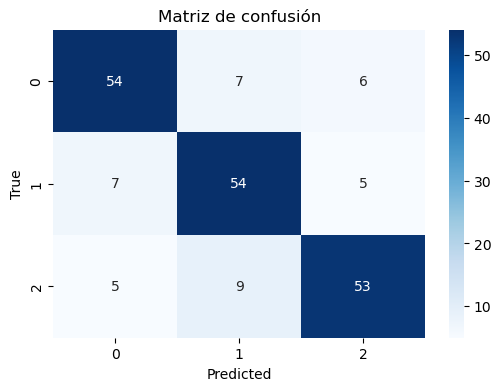

In [7]:
# Matriz de confusión (visual)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de confusión')
plt.show()

Explicación de la matriz de confusión:
- La matriz muestra el conteo de predicciones por clase verdadera vs clase predicha.
- Es útil para detectar confusiones entre clases específicas.

In [9]:
# Búsqueda de hiperparámetros con validación cruzada (GridSearchCV)
param_grid = {
n_neighbors: [3, 5, 7, 9],         # probar distintos K
"weights": ['uniform', 'distance'], # tipos de ponderación
"metric": ['minkowski', 'euclidean', 'manhattan'] # métricas de distancia
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid.fit(X_train_scaled, y_train)
print('Mejores parámetros:', grid.best_params_)
print('Mejor score (CV):', grid.best_score_)

# Evaluar mejor estimador en test
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
print('Accuracy (mejor modelo):', accuracy_score(y_test, y_pred_best))

NameError: name 'n_neighbors' is not defined

Explicación de la búsqueda de hiperparámetros:
- param_grid: define las combinaciones de hiperparámetros que queremos probar.
- GridSearchCV: realiza validación cruzada (cv=5) para estimar el desempeño medio de cada combinación.
- n_jobs=-1: usa todos los cores disponibles para acelerar la búsqueda.
- grid.best_params_: los hiperparámetros que obtuvieron mejor performance en CV.
- Después evaluamos el mejor estimador en el conjunto de test para obtener una estimación honesta.

## Notas sobre hiperparámetros y consideraciones prácticas
- n_neighbors (K): controla el sesgo/varianza. K pequeño -> menos sesgo pero más varianza; K grande -> más sesgo y menos varianza.
- weights: 'distance' puede ayudar cuando puntos cercanos son más relevantes que lejanos.
- metric: la elección de la métrica afecta cómo se miden las distancias entre puntos (euclidiana, manhattan, etc.).
- Escalado: imprescindible en KNN si las características tienen escalas distintas.
- Dimensionalidad: KNN sufre en espacios de alta dimensión (maldición de la dimensionalidad).
- Eficiencia: para datasets grandes, usar estructuras como KD-Tree o Ball-Tree (parámetro algorithm) o métodos aproximados.

## Resumen y siguientes pasos
- Hemos mostrado cómo generar datos, entrenar un KNN, evaluar y ajustar hiperparámetros.
- Siguientes pasos recomendados: probar con datos reales, explorar técnicas de reducción de dimensionalidad (PCA), y comparar con otros clasificadores (SVM, RandomForest).
- Puedes ajustar la rejilla de búsqueda para incluir 'leaf_size', 'p' (parámetro de Minkowski), y 'algorithm' según necesidades.